In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

### Loading the Dataset

In [33]:
df = pd.read_csv(r'\Users\AIDL-LAB\Desktop\Dashan\dataset\train.csv', encoding='utf-8')
df

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...
...,...,...,...
93681,Online Financial Fraud,Internet Banking Related Fraud,Identity theft Smishing SMS Fraud CreditDeb...
93682,Online Financial Fraud,EWallet Related Fraud,RECEIVED CALL FROM NUMBER ASKING ABOUT phone ...
93683,Online Financial Fraud,UPI Related Frauds,Cyber Stalking Blackmailing PhoneSMSVOIP C...
93684,Online and Social Media Related Crime,Online Matrimonial Fraud,Call karke bola ki aapka lotary laga ha aru AC...


In [34]:
df_test  = pd.read_csv(r'\Users\AIDL-LAB\Desktop\Dashan\dataset\test.csv', encoding='utf-8')
df_test

,category,sub_category,crimeaditionalinfo
0,RapeGang Rape RGRSexually Abusive Content,NaN,Sir namaskar mein Ranjit Kumar PatraPaise neh...
1,Online Financial Fraud,DebitCredit Card FraudSim Swap Fraud,KOTAK MAHINDRA BANK FRAUD\r\nFRAUD AMOUNT
2,Cyber Attack/ Dependent Crimes,SQL Injection,The issue actually started when I got this ema...
3,Online Financial Fraud,Fraud CallVishing,I am amit kumar from karwi chitrakoot I am tot...
4,Any Other Cyber Crime,Other,I have ordered saree and blouse from rinki s...
...,...,...,...
31224,Online and Social Media Related Crime,Online Matrimonial Fraud,A lady named Rashmi probably a fake name had c...
31225,Online Financial Fraud,Internet Banking Related Fraud,I am Mr Chokhe Ram Two pers mobile number wer...
31226,Any Other Cyber Crime,Other,Mai Bibekbraj maine pahle ki complain kar chuk...
31227,Online Financial Fraud,Internet Banking Related Fraud,received URL link for updating KYC from mobile...


In [35]:
df.shape

(93686, 3)

In [36]:
df.sample(10)

,category,sub_category,crimeaditionalinfo
72068,Sexually Explicit Act,NaN,Dear Sir Madam\r\nHappy day\r\nIm on the righ...
78418,Online and Social Media Related Crime,Profile Hacking Identity Theft,Getting harrassment call and text on whatsapp ...
57687,Online Financial Fraud,Internet Banking Related Fraud,I received this sms from That Asked for up...
93206,Online Financial Fraud,Fraud CallVishing,HAMARE PASS PERSONE KA ONLY PHOTO AND WHTSPP P...
84448,Hacking Damage to computercomputer system etc,Unauthorised AccessData Breach,Send me link online I had install application ...
32134,Online Financial Fraud,DebitCredit Card FraudSim Swap Fraud,phone pe app sbi custome...
9284,Online Financial Fraud,UPI Related Frauds,FRAUD THROUGH UPI FRAUD PHONEPE \r\nBANK STA...
51770,Online Financial Fraud,UPI Related Frauds,FRAUD THROUGH UPI FRAUD GOOGLE PE \r\nBANK ...
6772,Online Financial Fraud,UPI Related Frauds,FRAUD THROUGH GOOGLE PAY\r\nBANK INDIAN BANK\r...
90828,Online Financial Fraud,Internet Banking Related Fraud,FRAUD THROUGH Internet Banking Related Fraud\...


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93686 entries, 0 to 93685
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            93686 non-null  object
 1   sub_category        87095 non-null  object
 2   crimeaditionalinfo  93665 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB


In [38]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31229 entries, 0 to 31228
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            31229 non-null  object
 1   sub_category        28993 non-null  object
 2   crimeaditionalinfo  31222 non-null  object
dtypes: object(3)
memory usage: 732.1+ KB


In [39]:
df.isnull().sum()

category                 0
sub_category          6591
crimeaditionalinfo      21
dtype: int64

In [40]:
df_test.isnull().sum()

category                 0
sub_category          2236
crimeaditionalinfo       7
dtype: int64

In [41]:
df = df.dropna(subset=['crimeaditionalinfo'])
df_test = df_test.dropna(subset=['crimeaditionalinfo'])

In [42]:
df.describe()

,category,sub_category,crimeaditionalinfo
count,93665,87074,93665
unique,15,35,85013
top,Online Financial Fraud,UPI Related Frauds,Respected Sir\r\n\r\nA very serious matter I w...
freq,57416,26843,2342


### Exploratory Data Analysis

In [43]:
df[df.duplicated()].sample(10)

,category,sub_category,crimeaditionalinfo
86384,Online Financial Fraud,UPI Related Frauds,Dear Sir\r\nKindly stop the fraudulent transac...
17158,RapeGang Rape RGRSexually Abusive Content,NaN,Respected Sir\r\n\r\nA very serious matter I w...
65744,Online Financial Fraud,UPI Related Frauds,FRAUD THROUGH UPI FRAUD PAYTM\r\nBANK STATE...
4303,RapeGang Rape RGRSexually Abusive Content,NaN,Respected Sir\r\n\r\nA very serious matter I w...
90607,Online Financial Fraud,DebitCredit Card FraudSim Swap Fraud,The caller sends money after seeing a fake ad
50987,RapeGang Rape RGRSexually Abusive Content,NaN,Respected Sir\r\n\r\nA very serious matter I w...
62091,RapeGang Rape RGRSexually Abusive Content,NaN,Respected Sir\r\n\r\nA very serious matter I w...
8018,Online Financial Fraud,DebitCredit Card FraudSim Swap Fraud,Financial Fraud
64335,RapeGang Rape RGRSexually Abusive Content,NaN,Respected Sir\r\n\r\nA very serious matter I w...
64846,Online Financial Fraud,Internet Banking Related Fraud,UPI FRAUD


In [44]:
df = df.drop_duplicates()
df_test = df_test.drop_duplicates()

In [45]:
df

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...
...,...,...,...
93681,Online Financial Fraud,Internet Banking Related Fraud,Identity theft Smishing SMS Fraud CreditDeb...
93682,Online Financial Fraud,EWallet Related Fraud,RECEIVED CALL FROM NUMBER ASKING ABOUT phone ...
93683,Online Financial Fraud,UPI Related Frauds,Cyber Stalking Blackmailing PhoneSMSVOIP C...
93684,Online and Social Media Related Crime,Online Matrimonial Fraud,Call karke bola ki aapka lotary laga ha aru AC...


In [46]:
df['category'].value_counts().reset_index()

,category,count
0,Online Financial Fraud,52496
1,Online and Social Media Related Crime,12076
2,Any Other Cyber Crime,10811
3,Cyber Attack/ Dependent Crimes,3608
4,Sexually Obscene material,1764
5,Hacking Damage to computercomputer system etc,1709
6,Sexually Explicit Act,1489
7,Cryptocurrency Crime,473
8,Online Gambling Betting,444
9,Child Pornography CPChild Sexual Abuse Materia...,357


In [47]:
df['sub_category'].value_counts().reset_index()

,sub_category,count
0,UPI Related Frauds,23526
1,Other,10811
2,DebitCredit Card FraudSim Swap Fraud,10044
3,Internet Banking Related Fraud,8096
4,Fraud CallVishing,5780
5,Cyber Bullying Stalking Sexting,4051
6,EWallet Related Fraud,4008
7,FakeImpersonating Profile,2289
8,Profile Hacking Identity Theft,2070
9,Cheating by Impersonation,1980


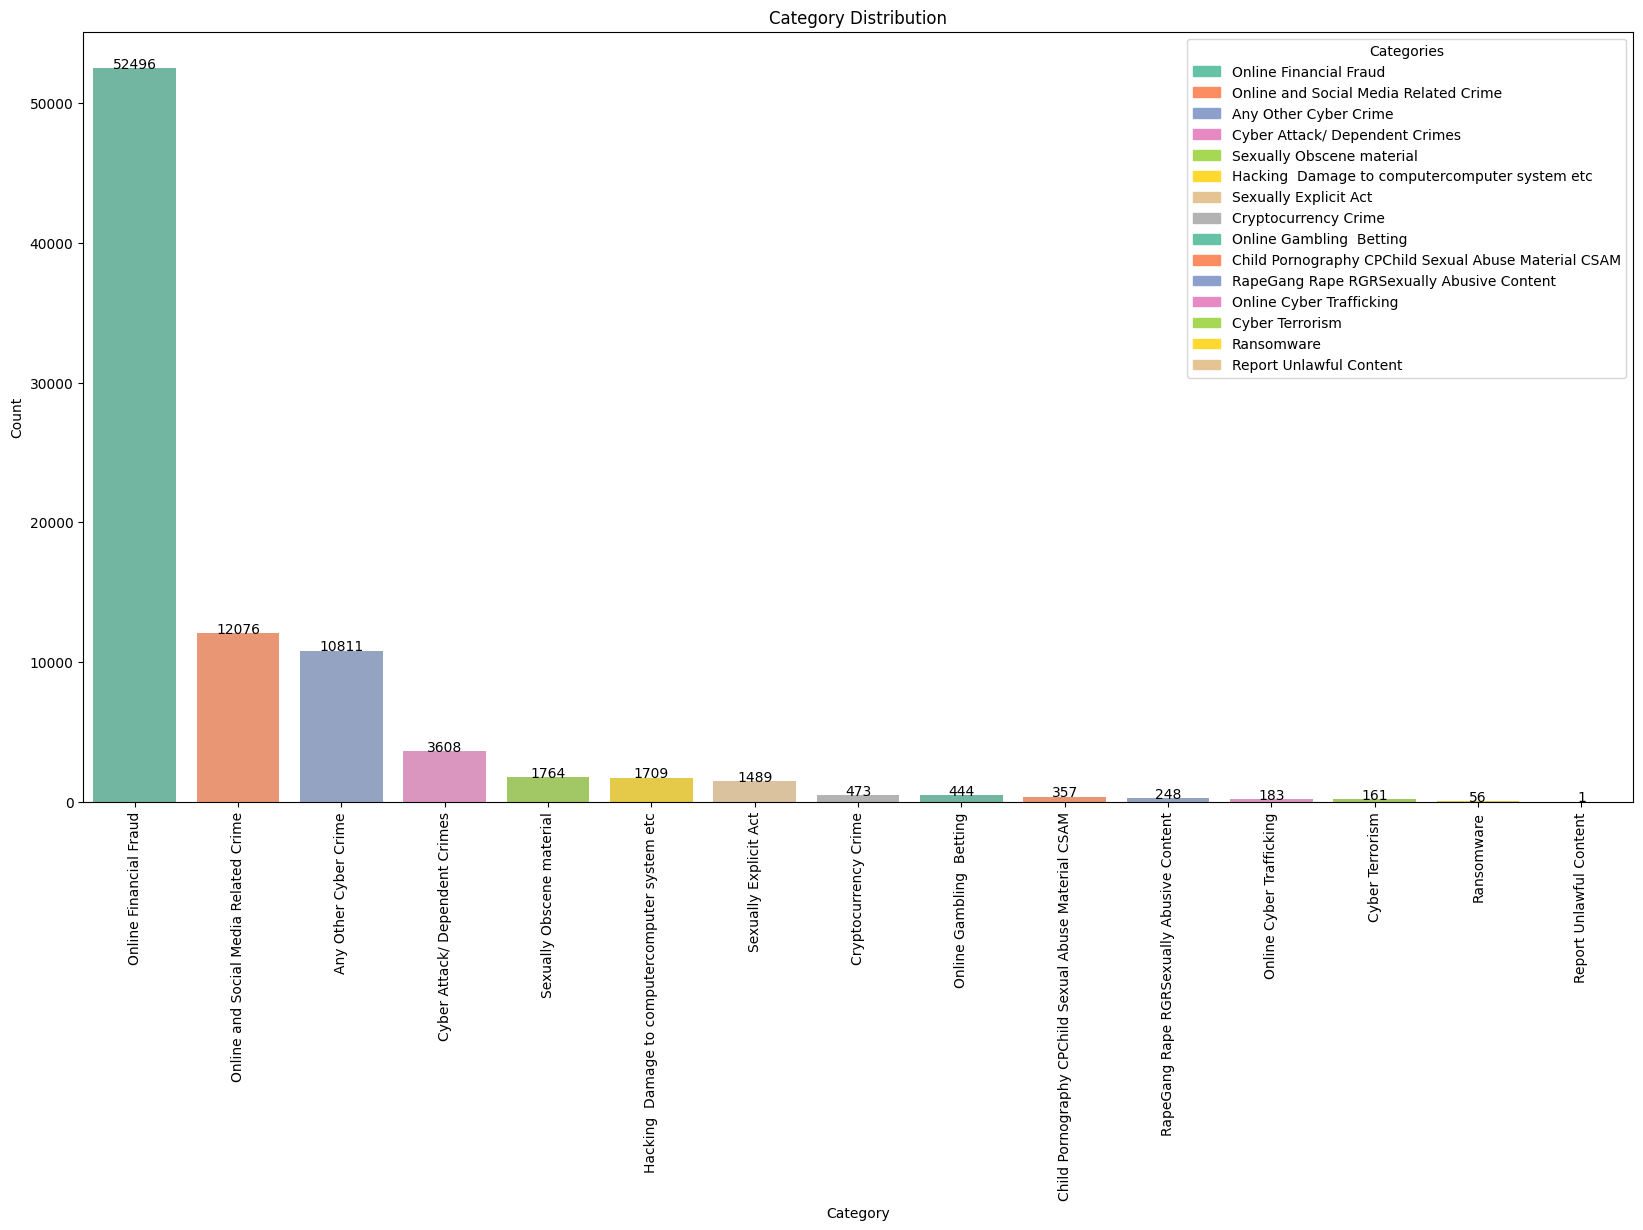

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.patches as mpatches

category_counts = df['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

palette = sns.color_palette('Set2', n_colors=len(category_counts))

plt.figure(figsize=(20, 10))
sns.barplot(x='category', y='count', data=category_counts, hue='category', palette=palette, dodge=False)

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Distribution')
plt.xticks(rotation=90)

for index, row in category_counts.iterrows():
    plt.text(row.name, row['count'] + 0.5, row['count'], color='black', ha="center")

legend_patches = [mpatches.Patch(color=palette[i], label=category_counts['category'][i]) for i in range(len(category_counts))]
plt.legend(handles=legend_patches, title='Categories')

plt.show()

In [49]:
df['category'].value_counts(normalize=True)*100

category
Online Financial Fraud                                  61.130001
Online and Social Media Related Crime                   14.062136
Any Other Cyber Crime                                   12.589082
Cyber Attack/ Dependent Crimes                           4.201407
Sexually Obscene material                                2.054125
Hacking  Damage to computercomputer system etc           1.990079
Sexually Explicit Act                                    1.733895
Cryptocurrency Crime                                     0.550794
Online Gambling  Betting                                 0.517025
Child Pornography CPChild Sexual Abuse Material CSAM     0.415716
RapeGang Rape RGRSexually Abusive Content                0.288788
Online Cyber Trafficking                                 0.213098
Cyber Terrorism                                          0.187480
Ransomware                                               0.065210
Report Unlawful Content                                  0.001164
N

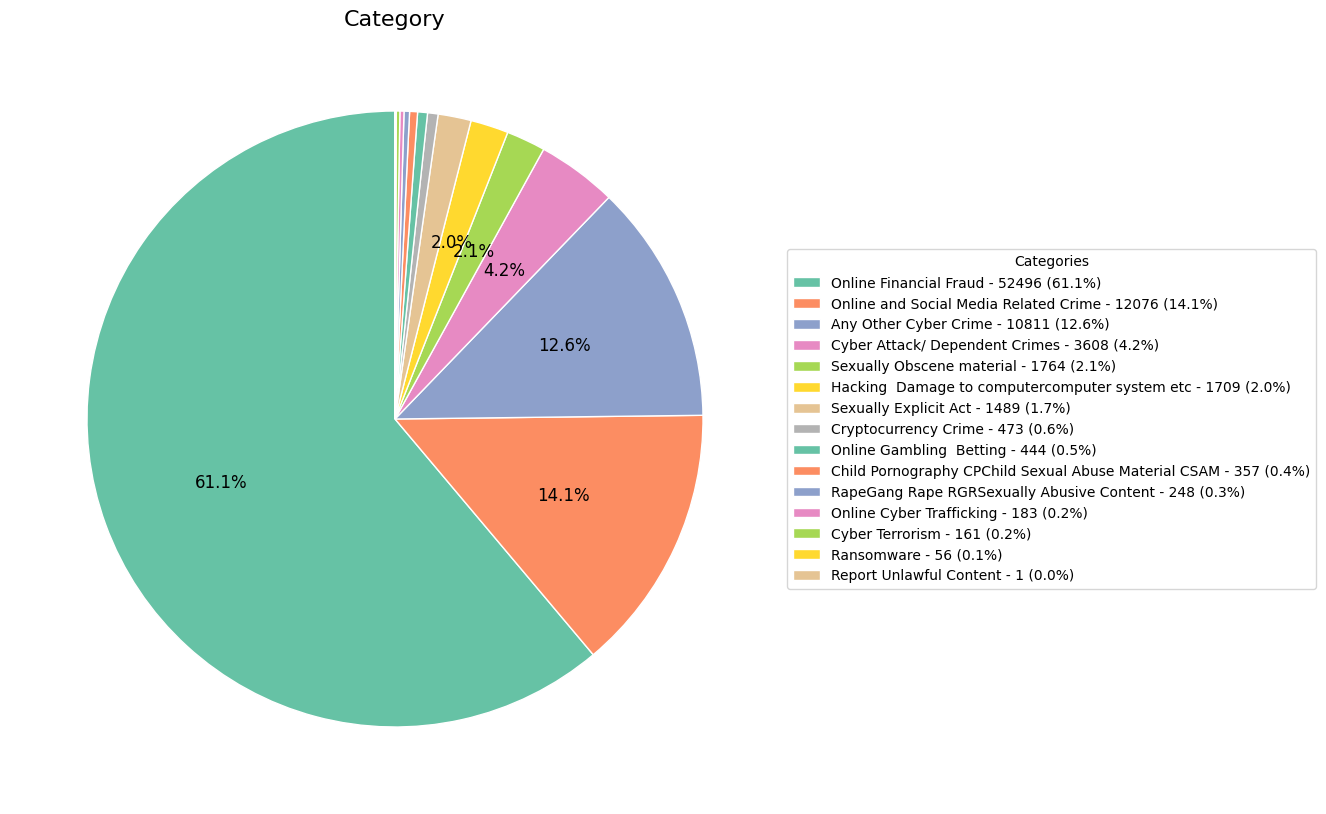

In [50]:
def autopct_function(pct):
        return ('%1.1f%%' % pct) if pct > 1.9 else ''  

plt.figure(figsize=(12, 10))
wedges, texts, autotexts = plt.pie(category_counts['count'],
                                   autopct=autopct_function,
                                   startangle=90,
                                   colors=palette,
                                   textprops={'fontsize': 12},
                                   wedgeprops={'linewidth': 1, 'edgecolor': 'white'})  

plt.gca().set_aspect('equal')

plt.title('Category', fontsize=16)
legend_labels = [f'{category_counts["category"][i]} - {category_counts["count"][i]} ({(category_counts["count"][i] / category_counts["count"].sum()) * 100:.1f}%)' for i in range(len(category_counts))]
plt.legend(wedges, legend_labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Show the plot
plt.show()

C:\Users\AIDL-LAB\AppData\Local\Temp\ipykernel_17012\2110586686.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sub_category', y='count', data=subcategory_counts, palette=palette, dodge=False)


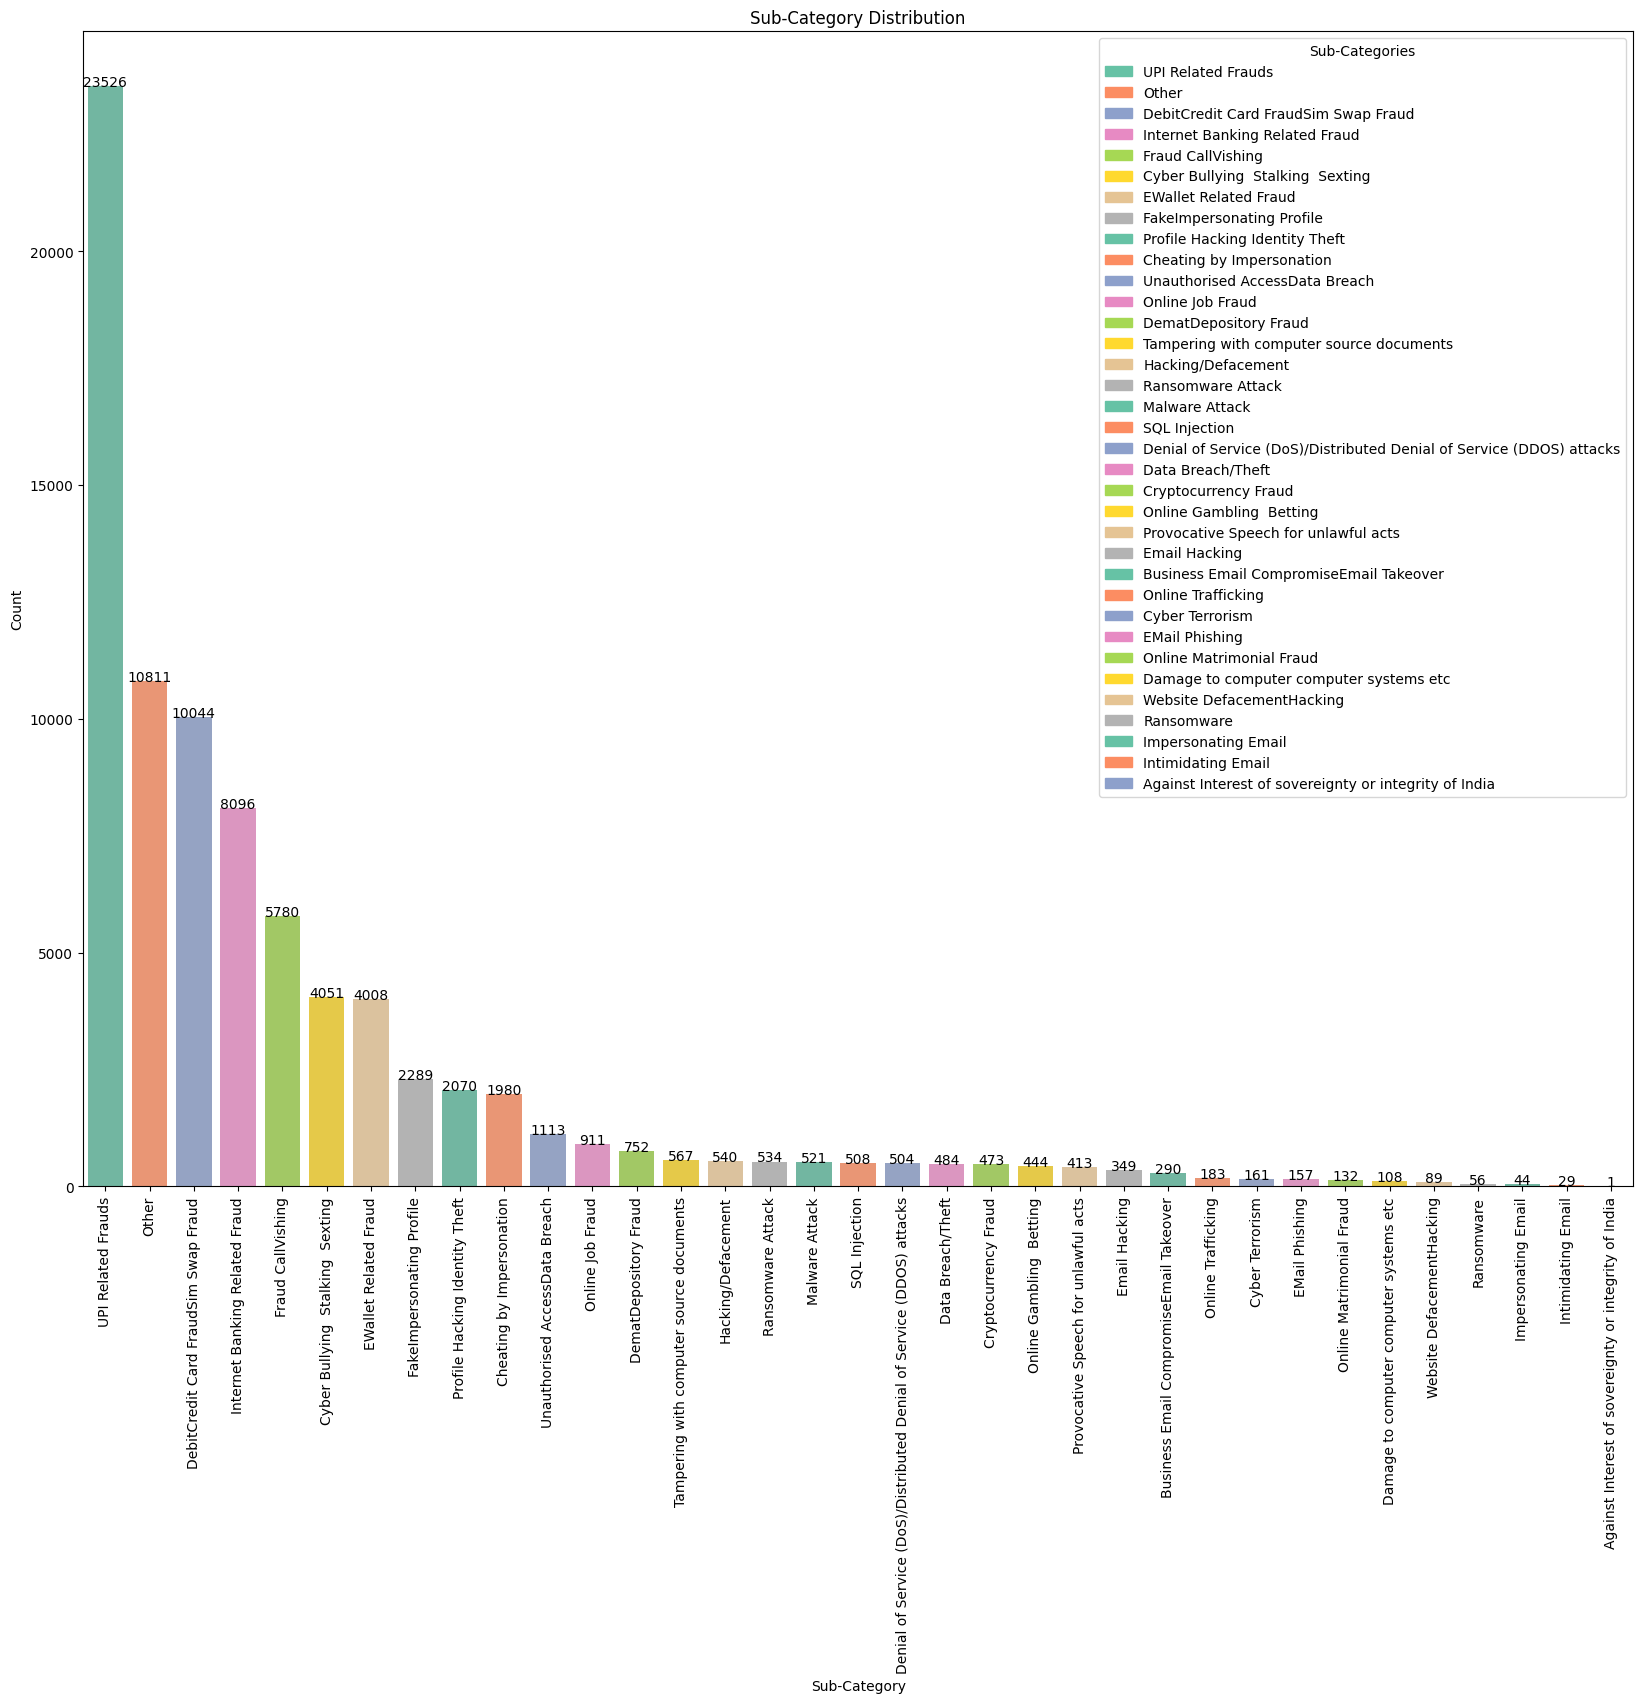

In [ ]:

subcategory_counts = df['sub_category'].value_counts().reset_index()
subcategory_counts.columns = ['sub_category', 'count']

palette = sns.color_palette('Set2', n_colors=len(subcategory_counts))

plt.figure(figsize=(20, 15))
sns.barplot(x='sub_category', y='count', data=subcategory_counts, palette=palette, dodge=False)

plt.xlabel('Sub-Category')
plt.ylabel('Count')
plt.title('Sub-Category Distribution')
plt.xticks(rotation=90)

for index, row in subcategory_counts.iterrows():
    plt.text(row.name, row['count'] + 0.5, row['count'], color='black', ha="center")

legend_patches = [mpatches.Patch(color=palette[i], label=subcategory_counts['sub_category'][i]) for i in range(len(subcategory_counts))]
plt.legend(handles=legend_patches, title='Sub-Categories')
plt.show()

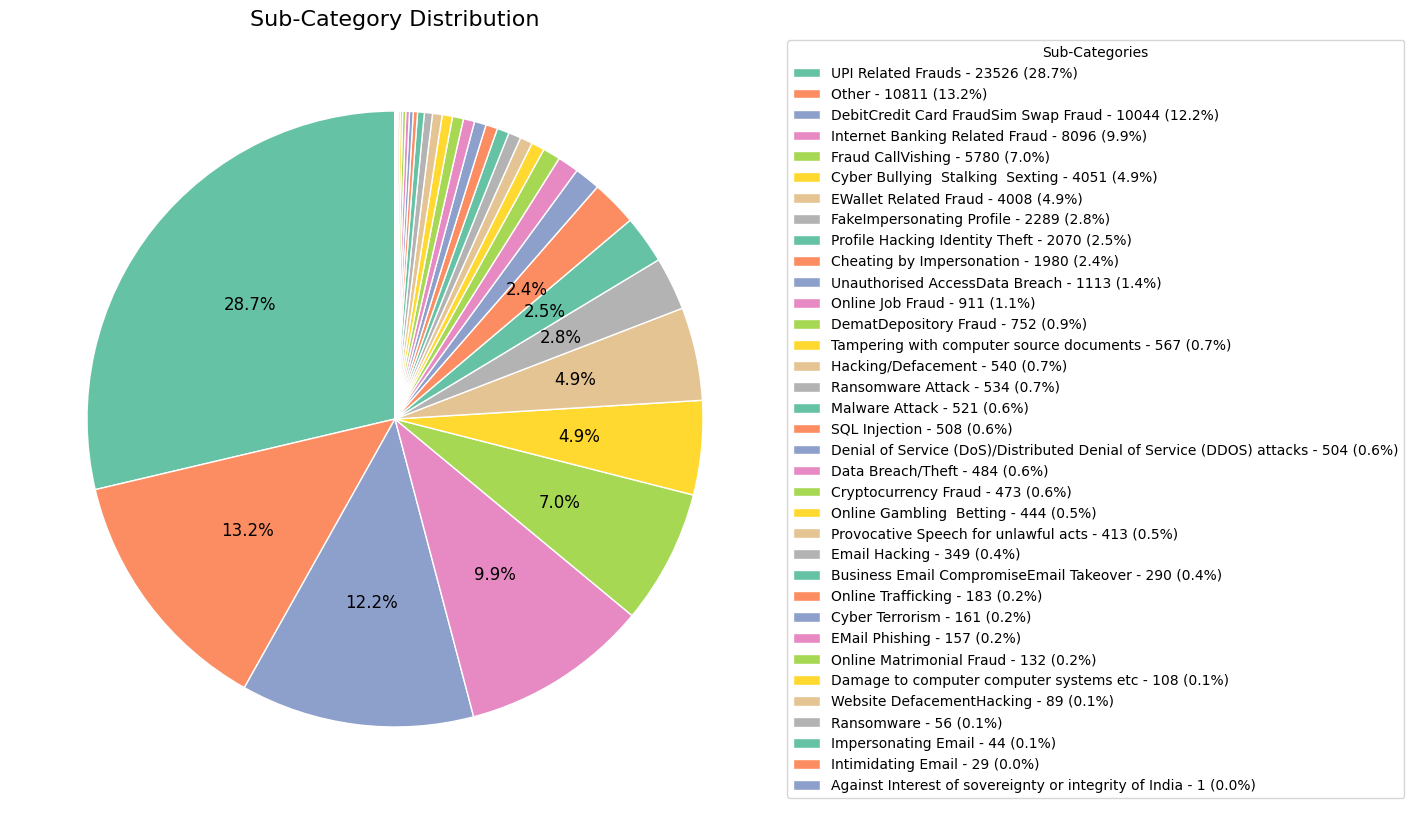

In [27]:
plt.figure(figsize=(12, 10))
wedges, texts, autotexts = plt.pie(subcategory_counts['count'],
                                   autopct=autopct_function,
                                   startangle=90,
                                   colors=palette,
                                   textprops={'fontsize': 12},
                                   wedgeprops={'linewidth': 1, 'edgecolor': 'white'}) 

plt.gca().set_aspect('equal')
plt.title('Sub-Category Distribution', fontsize=16)
legend_labels = [f'{subcategory_counts["sub_category"][i]} - {subcategory_counts["count"][i]} ({(subcategory_counts["count"][i] / subcategory_counts["count"].sum()) * 100:.1f}%)' for i in range(len(subcategory_counts))]
plt.legend(wedges, legend_labels, title="Sub-Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

In [28]:
pd.crosstab(df['category'],df['sub_category'])

sub_category,Against Interest of sovereignty or integrity of India,Business Email CompromiseEmail Takeover,Cheating by Impersonation,Cryptocurrency Fraud,Cyber Bullying Stalking Sexting,Cyber Terrorism,Damage to computer computer systems etc,Data Breach/Theft,DebitCredit Card FraudSim Swap Fraud,DematDepository Fraud,...,Other,Profile Hacking Identity Theft,Provocative Speech for unlawful acts,Ransomware,Ransomware Attack,SQL Injection,Tampering with computer source documents,UPI Related Frauds,Unauthorised AccessData Breach,Website DefacementHacking
category,,,,,,,,,,,,,,,,,,,,,
Any Other Cyber Crime,0,0,0,0,0,0,0,0,0,0,...,10811,0,0,0,0,0,0,0,0,0
Cryptocurrency Crime,0,0,0,473,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cyber Attack/ Dependent Crimes,0,0,0,0,0,0,0,484,0,0,...,0,0,0,0,534,508,517,0,0,0
Cyber Terrorism,0,0,0,0,0,161,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hacking Damage to computercomputer system etc,0,0,0,0,0,0,108,0,0,0,...,0,0,0,0,0,0,50,0,1113,89
Online Cyber Trafficking,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Online Financial Fraud,0,290,0,0,0,0,0,0,10044,752,...,0,0,0,0,0,0,0,23526,0,0
Online Gambling Betting,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Online and Social Media Related Crime,0,0,1980,0,4051,0,0,0,0,0,...,0,2070,413,0,0,0,0,0,0,0


<Axes: xlabel='sub_category', ylabel='category'>

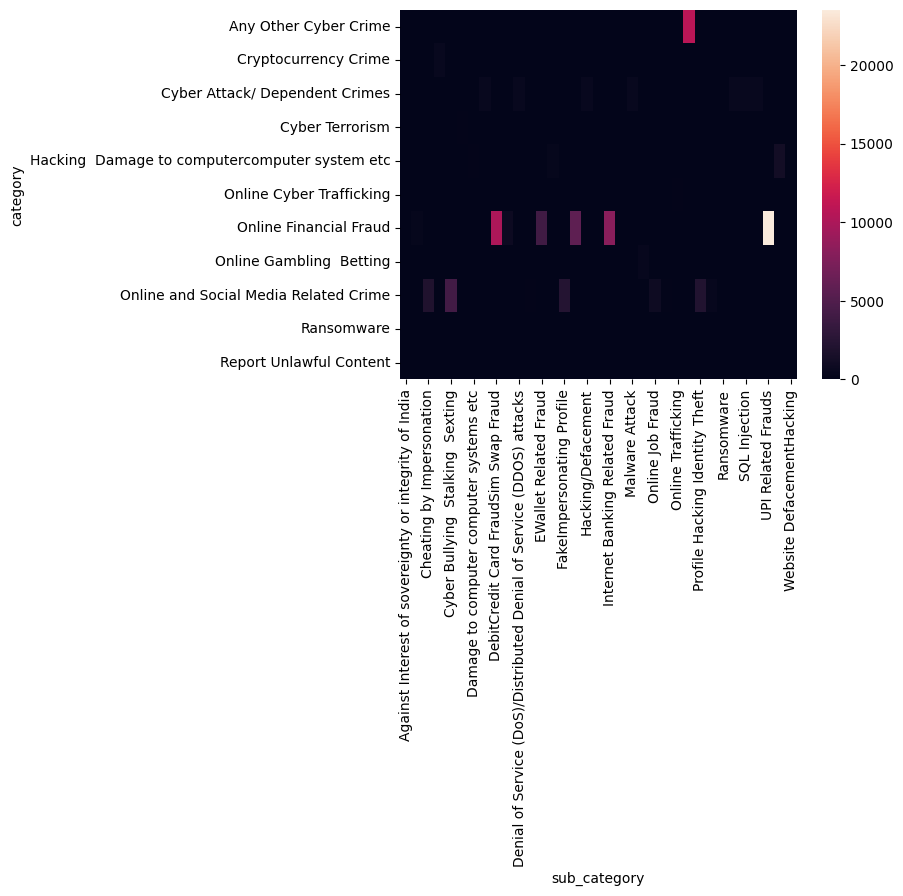

In [29]:
sns.heatmap(pd.crosstab(df['category'],df['sub_category']))

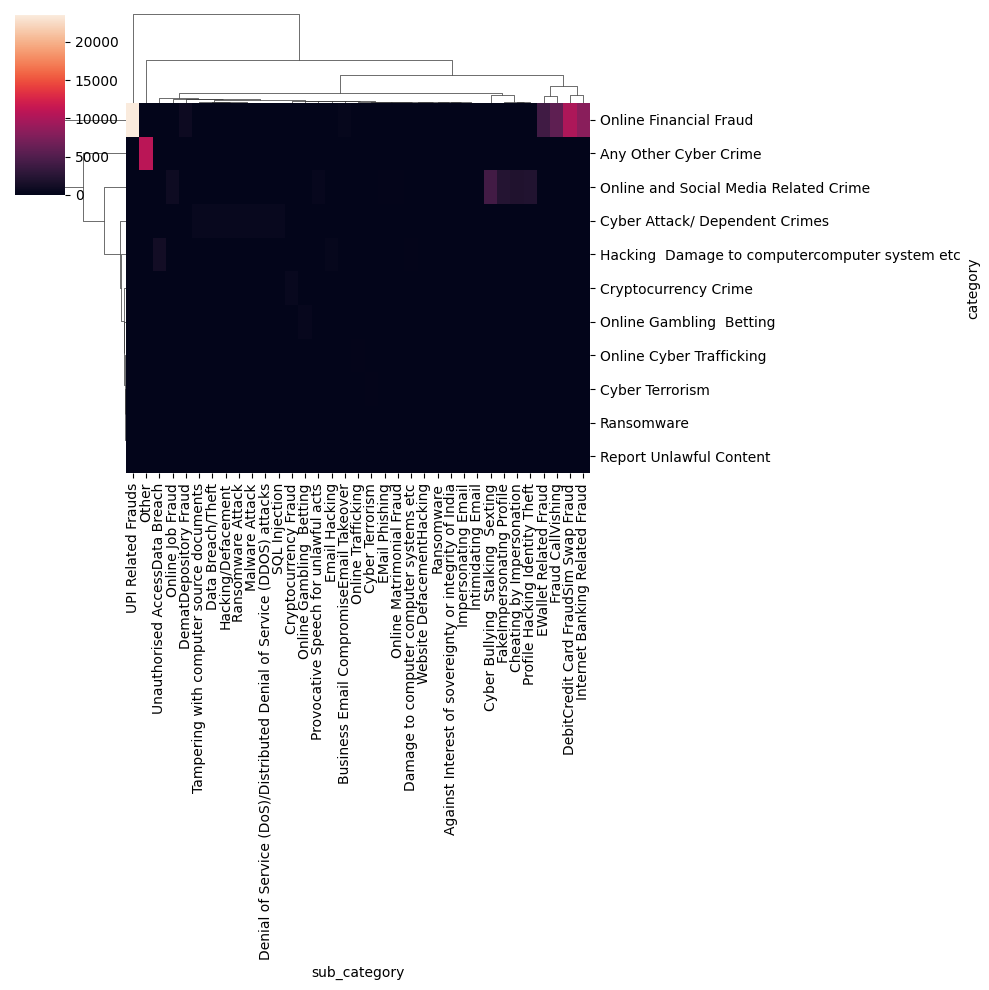

In [30]:
sns.clustermap(pd.crosstab(df['category'],df['sub_category']))

### Financial Fraud Crime 

In [62]:
df = pd.read_csv(r'\Users\AIDL-LAB\Desktop\Dashan\dataset\fin.csv', encoding='utf-8')
df

,category,sub_category,crimeaditionalinfo,new_category
0,Financial Fraud Crimes,Fraud CallVishing,The above fraudster is continuously messaging ...,Financial Fraud Crimes
1,Financial Fraud Crimes,Fraud CallVishing,I received a call from lady stating that she w...,Financial Fraud Crimes
2,Financial Fraud Crimes,UPI Related Frauds,FRAUD \t UPI PAYTM \r\nBANK \tPunjab National ...,Financial Fraud Crimes
3,Financial Fraud Crimes,Fraud CallVishing,Sir I am Prabhat Singh jat An app on playstor...,Financial Fraud Crimes
4,Financial Fraud Crimes,Internet Banking Related Fraud,FINANCIAL FRAUD RS,Financial Fraud Crimes
...,...,...,...,...
74099,Financial Fraud Crimes,Debit/Credit Card Fraud,I posted add on olx for labour from west Benga...,Financial Fraud Crimes
74100,Financial Fraud Crimes,Debit/Credit Card Fraud,Victim inform that he purchase some item from ...,Financial Fraud Crimes
74101,Financial Fraud Crimes,Debit/Credit Card Fraud,nameomsinghdistajmerpsramganjpincode\r\ncredit...,Financial Fraud Crimes
74102,Financial Fraud Crimes,Debit/Credit Card Fraud,Sir Mere Cradit Card se bina shoaping kiye hi ...,Financial Fraud Crimes


In [69]:
df['sub_category'].value_counts().reset_index()

,sub_category,count
0,UPI Related Frauds,31514
1,Debit/Credit Card Fraud,12108
2,Internet Banking Related Fraud,10877
3,Fraud CallVishing,7602
4,EWallet Related Fraud,5336
5,Aadhaar Enabled Payment System (AEPS) Fraud,3989
6,SIM Swap Fraud,1323
7,DematDepository Fraud,974
8,Business Email CompromiseEmail Takeover,380


C:\Users\AIDL-LAB\AppData\Local\Temp\ipykernel_17012\293883103.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sub_category', y='count', data=subcategory_counts, palette=palette, dodge=False)


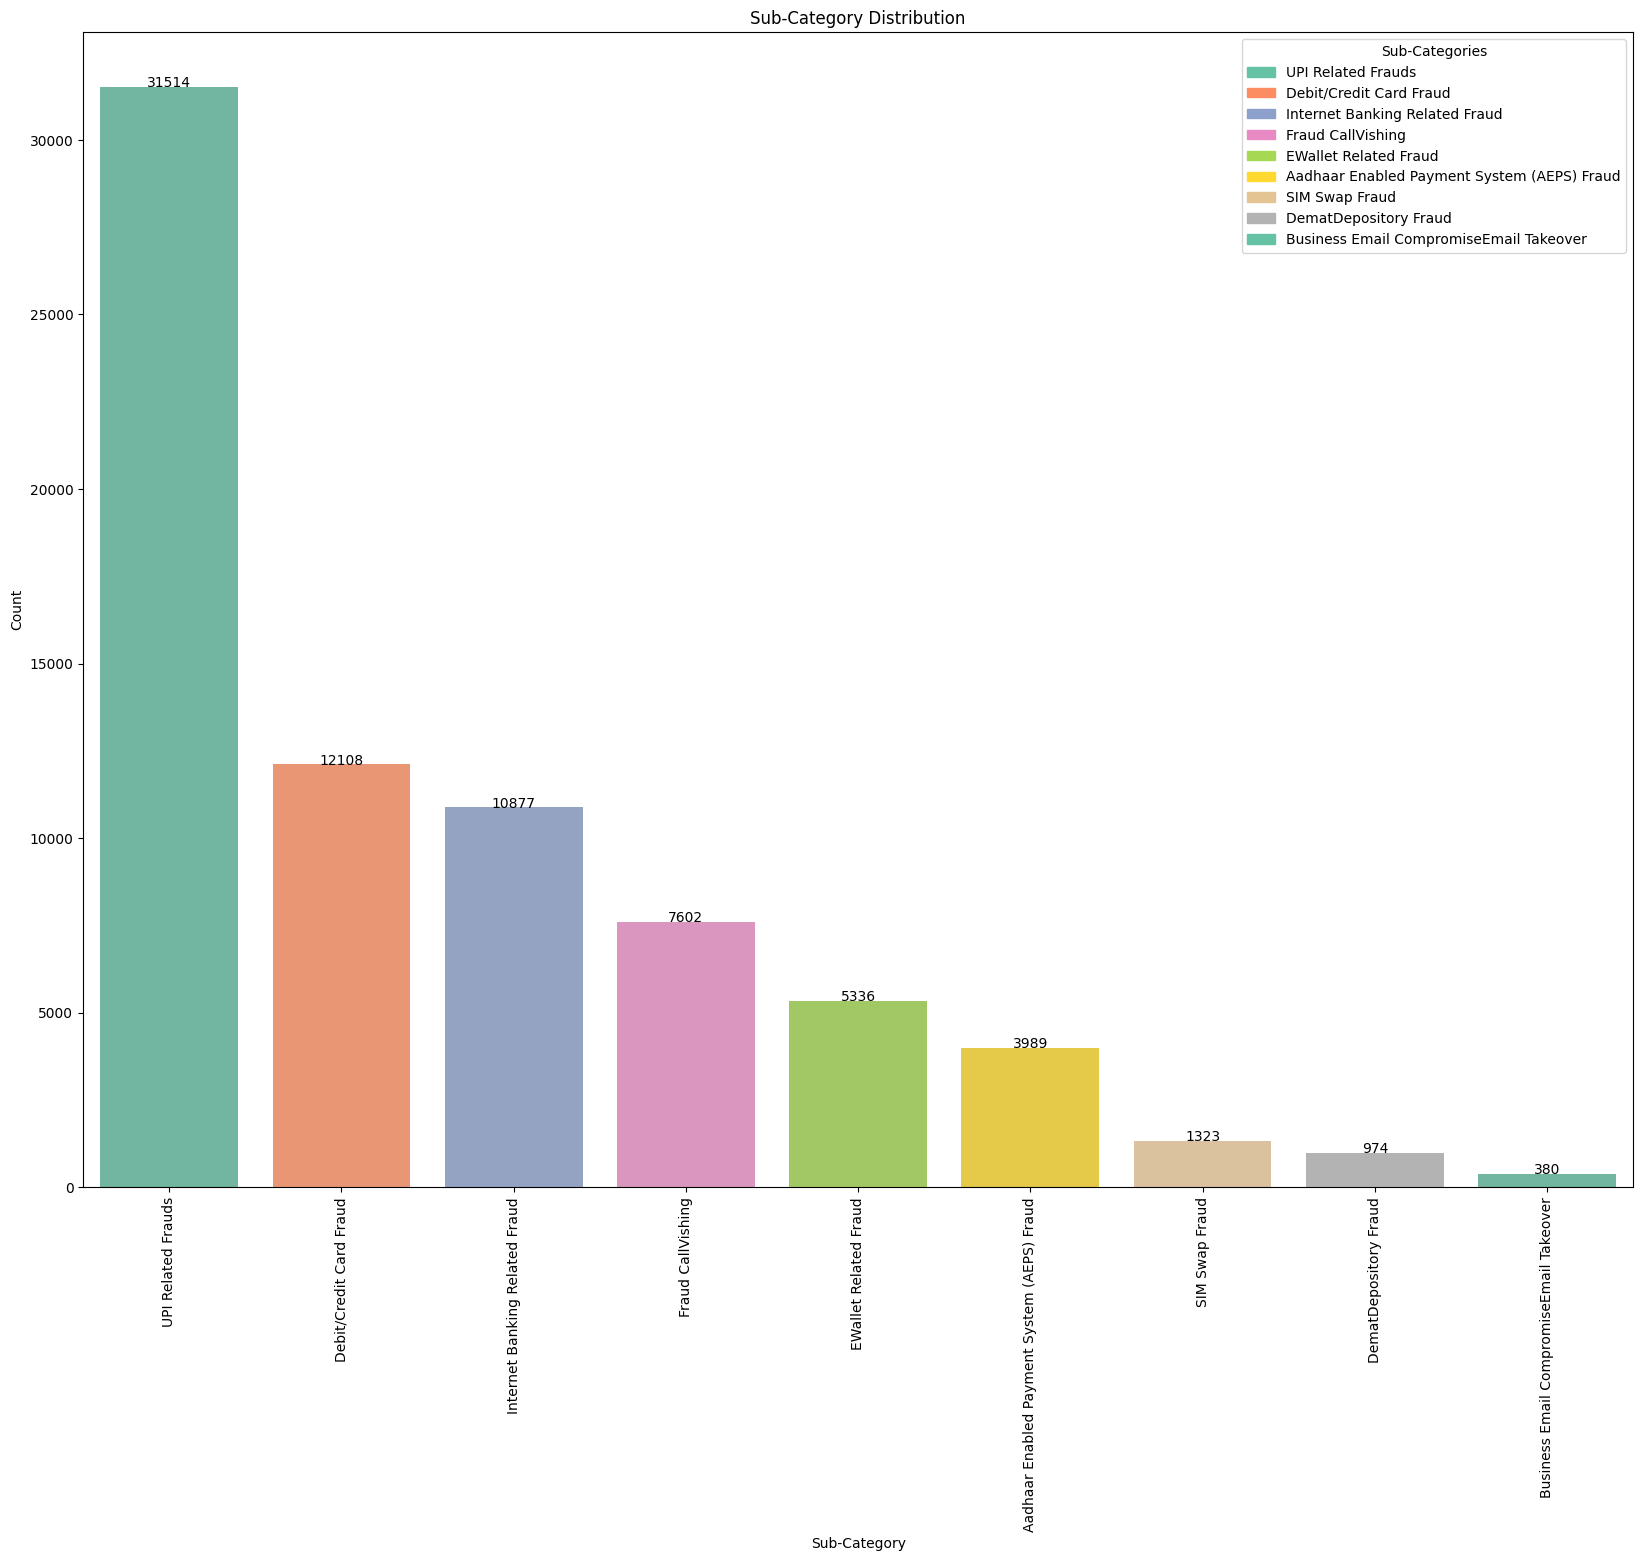

In [67]:

subcategory_counts = df['sub_category'].value_counts().reset_index()
subcategory_counts.columns = ['sub_category', 'count']

palette = sns.color_palette('Set2', n_colors=len(subcategory_counts))

plt.figure(figsize=(20, 15))
sns.barplot(x='sub_category', y='count', data=subcategory_counts, palette=palette, dodge=False)

plt.xlabel('Sub-Category')
plt.ylabel('Count')
plt.title('Sub-Category Distribution')
plt.xticks(rotation=90)

for index, row in subcategory_counts.iterrows():
    plt.text(row.name, row['count'] + 0.5, row['count'], color='black', ha="center")

legend_patches = [mpatches.Patch(color=palette[i], label=subcategory_counts['sub_category'][i]) for i in range(len(subcategory_counts))]
plt.legend(handles=legend_patches, title='Sub-Categories')
plt.show()

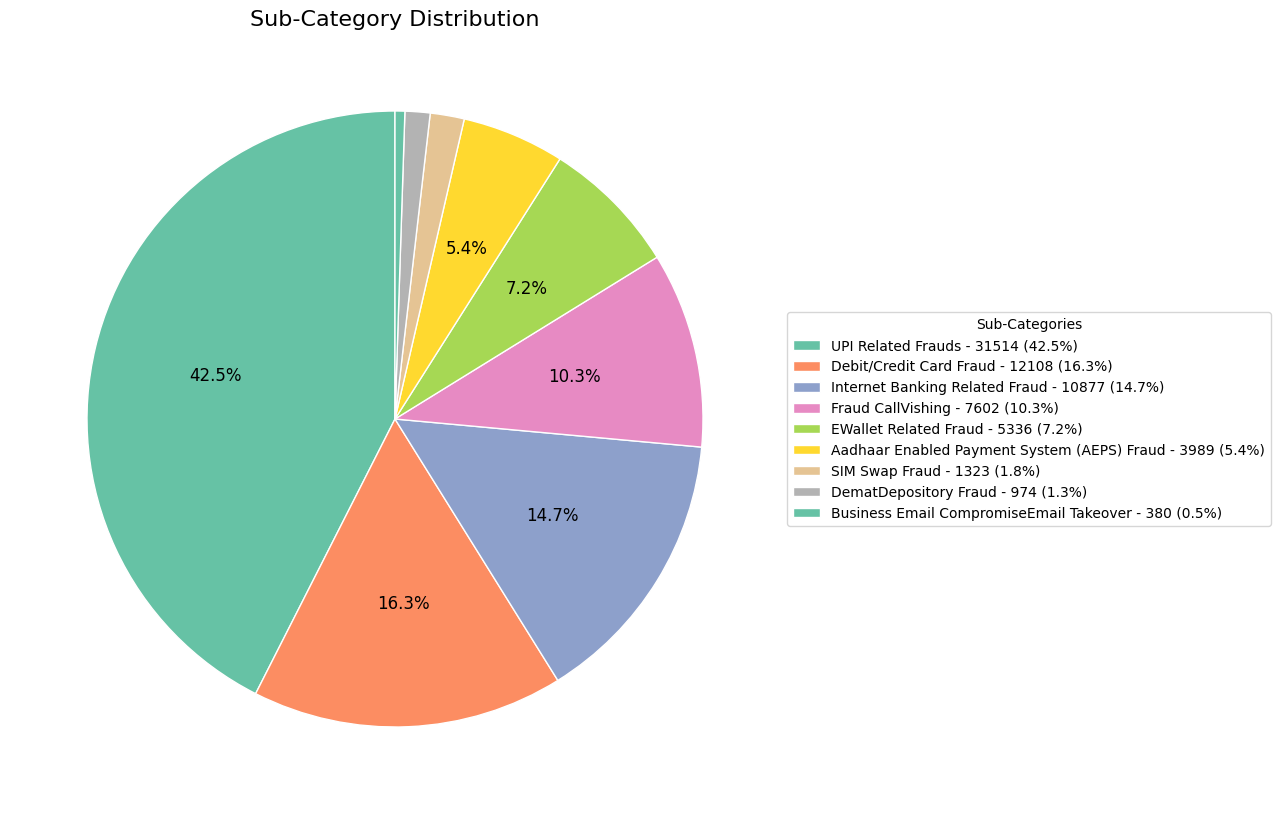

In [68]:
plt.figure(figsize=(12, 10))
wedges, texts, autotexts = plt.pie(subcategory_counts['count'],
                                   autopct=autopct_function,
                                   startangle=90,
                                   colors=palette,
                                   textprops={'fontsize': 12},
                                   wedgeprops={'linewidth': 1, 'edgecolor': 'white'}) 

plt.gca().set_aspect('equal')
plt.title('Sub-Category Distribution', fontsize=16)
legend_labels = [f'{subcategory_counts["sub_category"][i]} - {subcategory_counts["count"][i]} ({(subcategory_counts["count"][i] / subcategory_counts["count"].sum()) * 100:.1f}%)' for i in range(len(subcategory_counts))]
plt.legend(wedges, legend_labels, title="Sub-Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

In [63]:
pd.crosstab(df['category'],df['sub_category'])

sub_category,Aadhaar Enabled Payment System (AEPS) Fraud,Business Email CompromiseEmail Takeover,Debit/Credit Card Fraud,DematDepository Fraud,EWallet Related Fraud,Fraud CallVishing,Internet Banking Related Fraud,SIM Swap Fraud,UPI Related Frauds
category,,,,,,,,,
Financial Fraud Crimes,3989,380,12108,974,5336,7602,10877,1323,31514


<Axes: xlabel='sub_category', ylabel='category'>

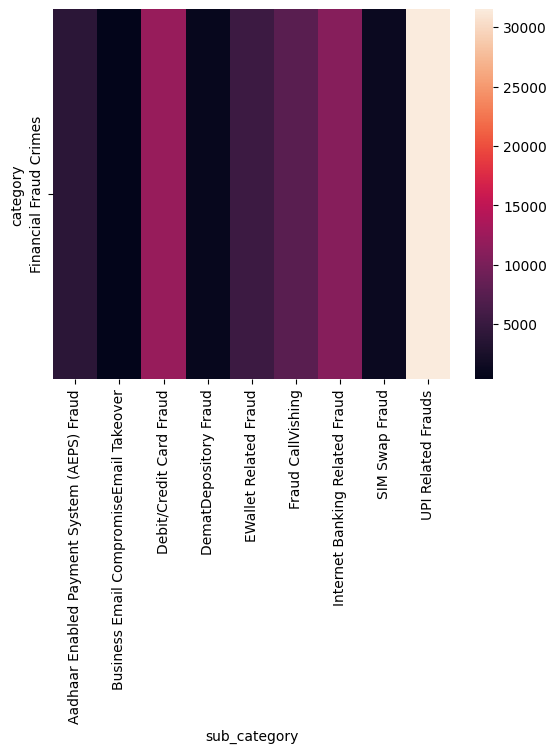

In [64]:
sns.heatmap(pd.crosstab(df['category'],df['sub_category']))

### Women/Child Related Crime

In [70]:
df = pd.read_csv(r'\Users\AIDL-LAB\Desktop\Dashan\dataset\women_child.csv', encoding='utf-8')
df

,category,sub_category,crimeaditionalinfo,new_category
0,Women/Child Related Crime,RapeGang Rape RGRSexually Abusive Content,I got the message on Whatsapp to my number The...,Women/Child Related Crime
1,Women/Child Related Crime,RapeGang Rape RGRSexually Abusive Content,Respected Sir\r\n\r\nA very serious matter I w...,Women/Child Related Crime
2,Women/Child Related Crime,Sexually Explicit Act,httpswwwxnxxtvvideousapbfuckkkarrr\r\n\r\n Abo...,Women/Child Related Crime
3,Women/Child Related Crime,Sexually Obscene material,Many fake accounts are created and Im sufferin...,Women/Child Related Crime
4,Women/Child Related Crime,Sexually Explicit Act,SirMaam \r\nThis is my third report on this re...,Women/Child Related Crime
...,...,...,...,...
5236,Women/Child Related Crime,Sexually Obscene material,I DO NOT KNOW WHOS IS MEKING FAKE IDs AND USIN...,Women/Child Related Crime
5237,Women/Child Related Crime,Sexually Obscene material,SIR THIS GUY NAME MANI CALLING IN WHATSAPP DA...,Women/Child Related Crime
5238,Women/Child Related Crime,Sexually Obscene material,They are hrash me after online sex they want m...,Women/Child Related Crime
5239,Women/Child Related Crime,Sexually Explicit Act,Sir I have lost nearly for a mistake I have m...,Women/Child Related Crime


In [74]:
df['sub_category'].value_counts().reset_index()

,sub_category,count
0,Sexually Obscene material,2414
1,Sexually Explicit Act,2016
2,Child Pornography CPChild Sexual Abuse Materia...,476
3,RapeGang Rape RGRSexually Abusive Content,335


C:\Users\AIDL-LAB\AppData\Local\Temp\ipykernel_17012\293883103.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sub_category', y='count', data=subcategory_counts, palette=palette, dodge=False)


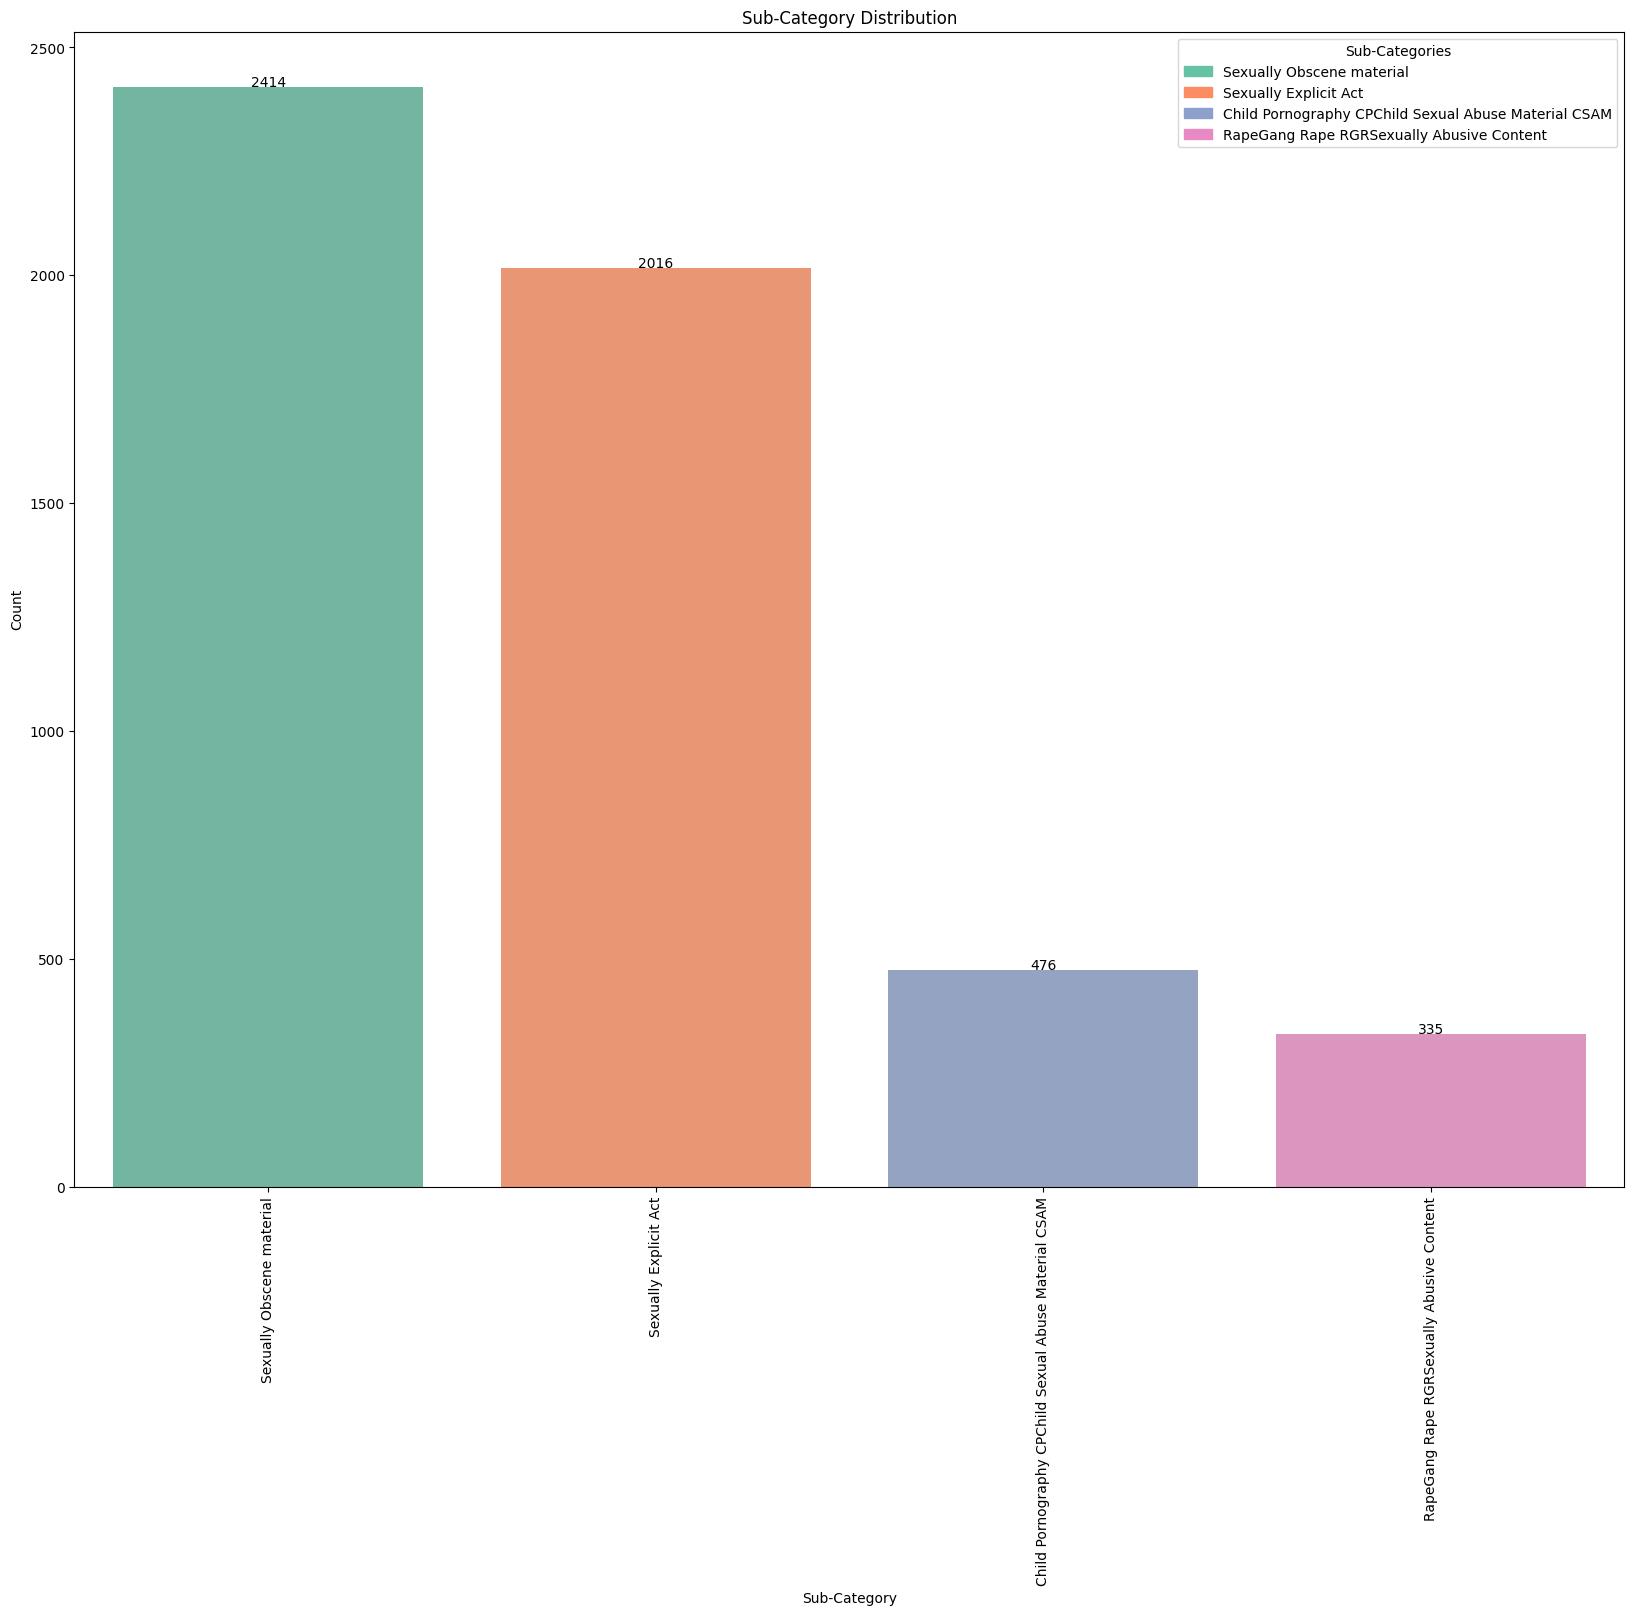

In [73]:

subcategory_counts = df['sub_category'].value_counts().reset_index()
subcategory_counts.columns = ['sub_category', 'count']

palette = sns.color_palette('Set2', n_colors=len(subcategory_counts))

plt.figure(figsize=(20, 15))
sns.barplot(x='sub_category', y='count', data=subcategory_counts, palette=palette, dodge=False)

plt.xlabel('Sub-Category')
plt.ylabel('Count')
plt.title('Sub-Category Distribution')
plt.xticks(rotation=90)

for index, row in subcategory_counts.iterrows():
    plt.text(row.name, row['count'] + 0.5, row['count'], color='black', ha="center")

legend_patches = [mpatches.Patch(color=palette[i], label=subcategory_counts['sub_category'][i]) for i in range(len(subcategory_counts))]
plt.legend(handles=legend_patches, title='Sub-Categories')
plt.show()

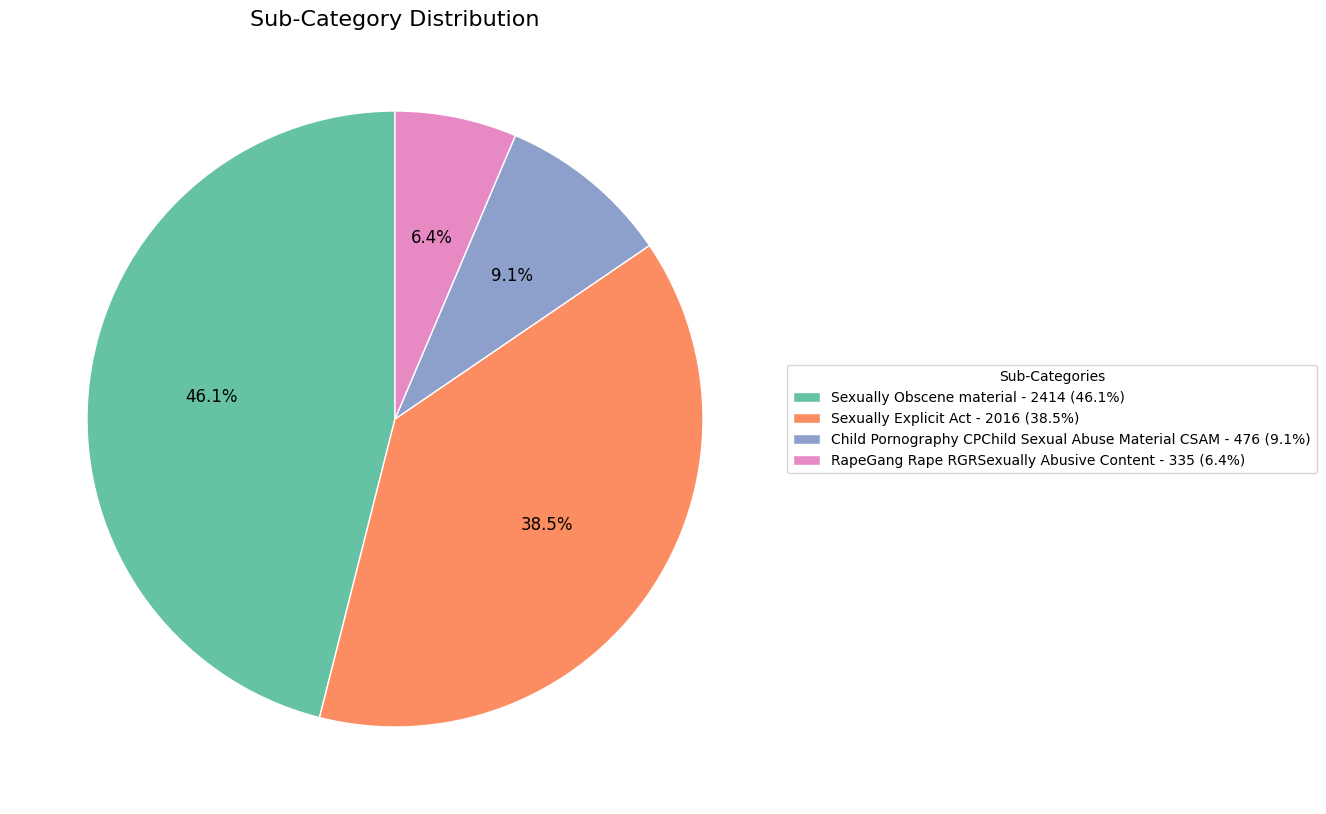

In [75]:
plt.figure(figsize=(12, 10))
wedges, texts, autotexts = plt.pie(subcategory_counts['count'],
                                   autopct=autopct_function,
                                   startangle=90,
                                   colors=palette,
                                   textprops={'fontsize': 12},
                                   wedgeprops={'linewidth': 1, 'edgecolor': 'white'}) 

plt.gca().set_aspect('equal')
plt.title('Sub-Category Distribution', fontsize=16)
legend_labels = [f'{subcategory_counts["sub_category"][i]} - {subcategory_counts["count"][i]} ({(subcategory_counts["count"][i] / subcategory_counts["count"].sum()) * 100:.1f}%)' for i in range(len(subcategory_counts))]
plt.legend(wedges, legend_labels, title="Sub-Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

In [72]:
pd.crosstab(df['category'],df['sub_category'])

sub_category,Child Pornography CPChild Sexual Abuse Material CSAM,RapeGang Rape RGRSexually Abusive Content,Sexually Explicit Act,Sexually Obscene material
category,,,,
Women/Child Related Crime,476,335,2016,2414


<Axes: xlabel='sub_category', ylabel='category'>

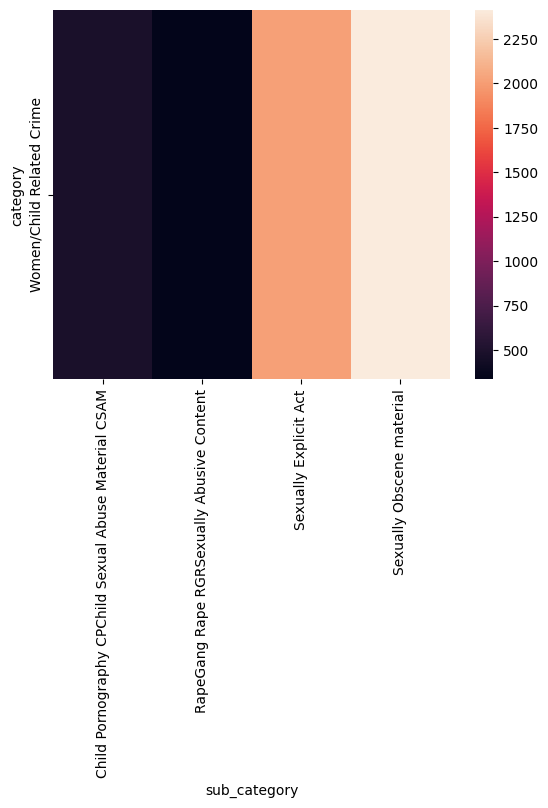

In [71]:
sns.heatmap(pd.crosstab(df['category'],df['sub_category']))

### Other Cyber Crime

In [77]:
df = pd.read_csv(r'\Users\AIDL-LAB\Desktop\Dashan\dataset\others.csv', encoding='utf-8')
df

,category,sub_category,crimeaditionalinfo,new_category
0,Other Cyber Crime,Email Phishing,Details entered in pdf file Person posing as A...,Other Cyber Crime
1,Other Cyber Crime,Unauthorized Access/Data Breach,Someone changed my email id nd contact number ...,Other Cyber Crime
2,Other Cyber Crime,Online Matrimonial Fraud,I ordered dress on th January online shopping...,Other Cyber Crime
3,Other Cyber Crime,Attacks via malicious mobile apps,I am having another mobile number which is usi...,Other Cyber Crime
4,Other Cyber Crime,Online Job Fraud,i was looking for a loan and i got to know abo...,Other Cyber Crime
...,...,...,...,...
10479,Other Cyber Crime,Intimidating Email,I received a threatening whatsapp message fro...,Other Cyber Crime
10480,Other Cyber Crime,Fake mobile apps,I got sms to e verification of my sim card ask...,Other Cyber Crime
10481,Other Cyber Crime,Profile Hacking/Identity Theft,On at pm I have received abusing whatsapp me...,Other Cyber Crime
10482,Other Cyber Crime,Online Job Fraud,Mai Bibekbraj maine pahle ki complain kar chuk...,Other Cyber Crime


In [83]:
df['sub_category'].value_counts().reset_index()

,sub_category,count
0,Online Job Fraud,4501
1,Email Phishing,787
2,Online Matrimonial Fraud,690
3,Attacks via malicious mobile apps,593
4,Fake mobile apps,564
5,Cyber Bullying/Stalking/Sexting,460
6,Online Cyber Trafficking,448
7,Profile Hacking/Identity Theft,340
8,Unauthorized Access/Data Breach,337
9,Online Gambling/Betting Fraud,329


C:\Users\AIDL-LAB\AppData\Local\Temp\ipykernel_17012\293883103.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sub_category', y='count', data=subcategory_counts, palette=palette, dodge=False)


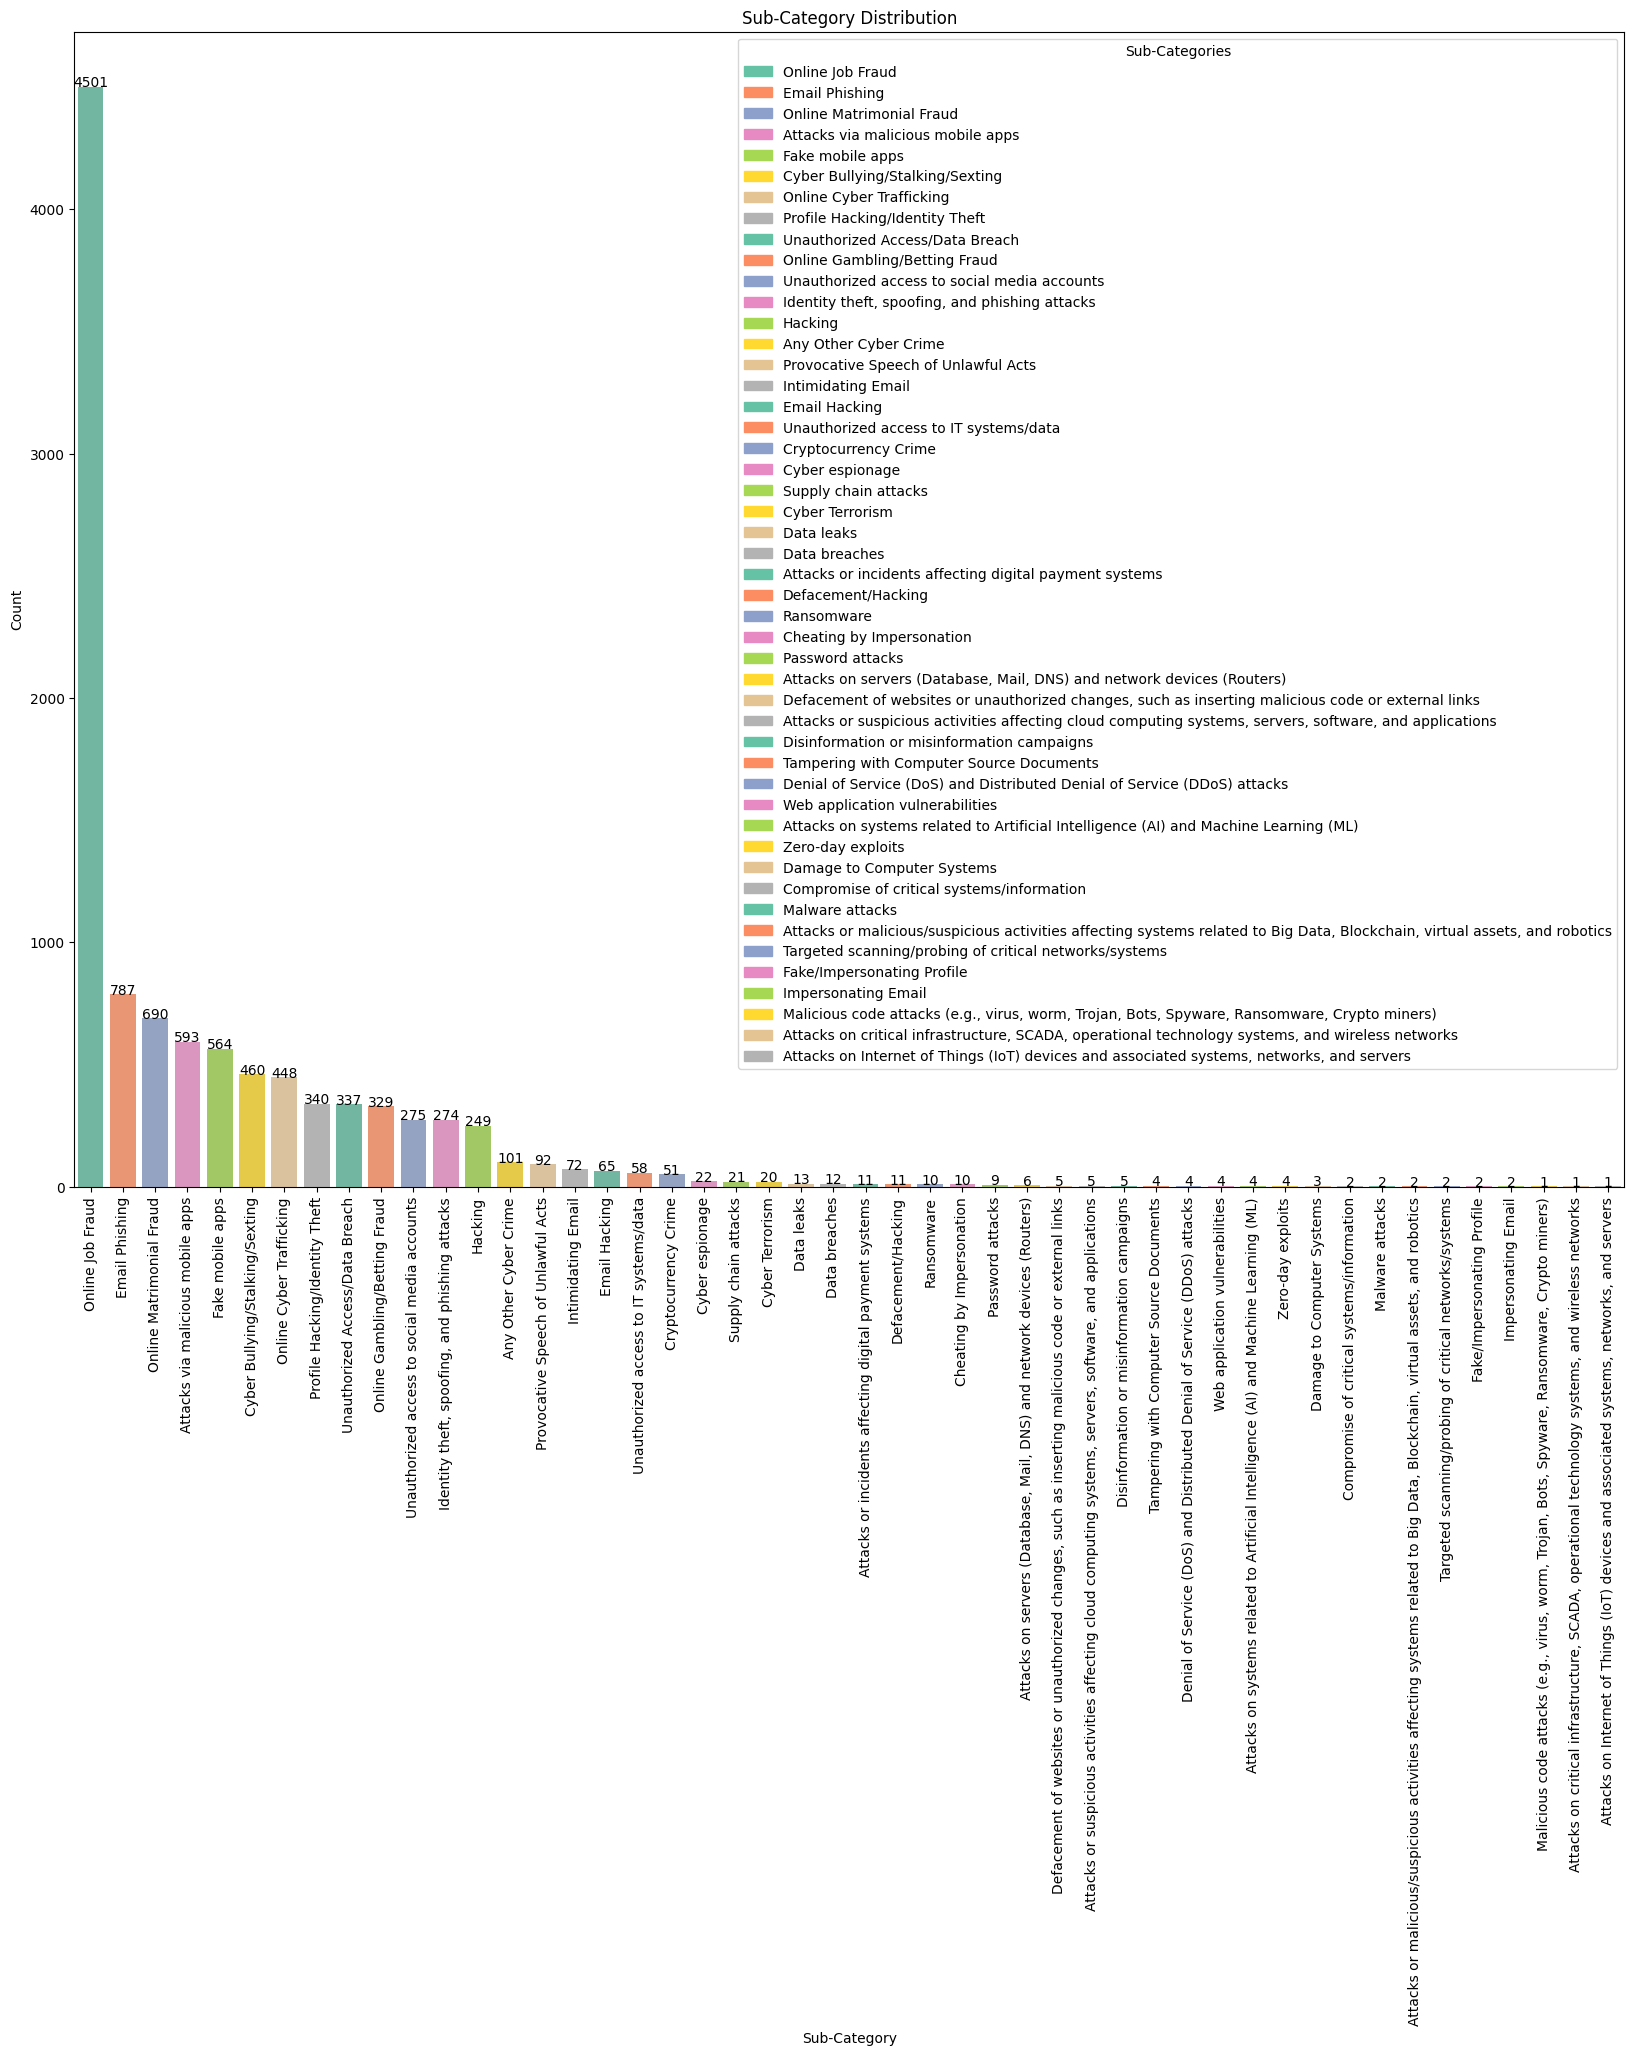

In [81]:

subcategory_counts = df['sub_category'].value_counts().reset_index()
subcategory_counts.columns = ['sub_category', 'count']

palette = sns.color_palette('Set2', n_colors=len(subcategory_counts))

plt.figure(figsize=(20, 15))
sns.barplot(x='sub_category', y='count', data=subcategory_counts, palette=palette, dodge=False)

plt.xlabel('Sub-Category')
plt.ylabel('Count')
plt.title('Sub-Category Distribution')
plt.xticks(rotation=90)

for index, row in subcategory_counts.iterrows():
    plt.text(row.name, row['count'] + 0.5, row['count'], color='black', ha="center")

legend_patches = [mpatches.Patch(color=palette[i], label=subcategory_counts['sub_category'][i]) for i in range(len(subcategory_counts))]
plt.legend(handles=legend_patches, title='Sub-Categories')
plt.show()

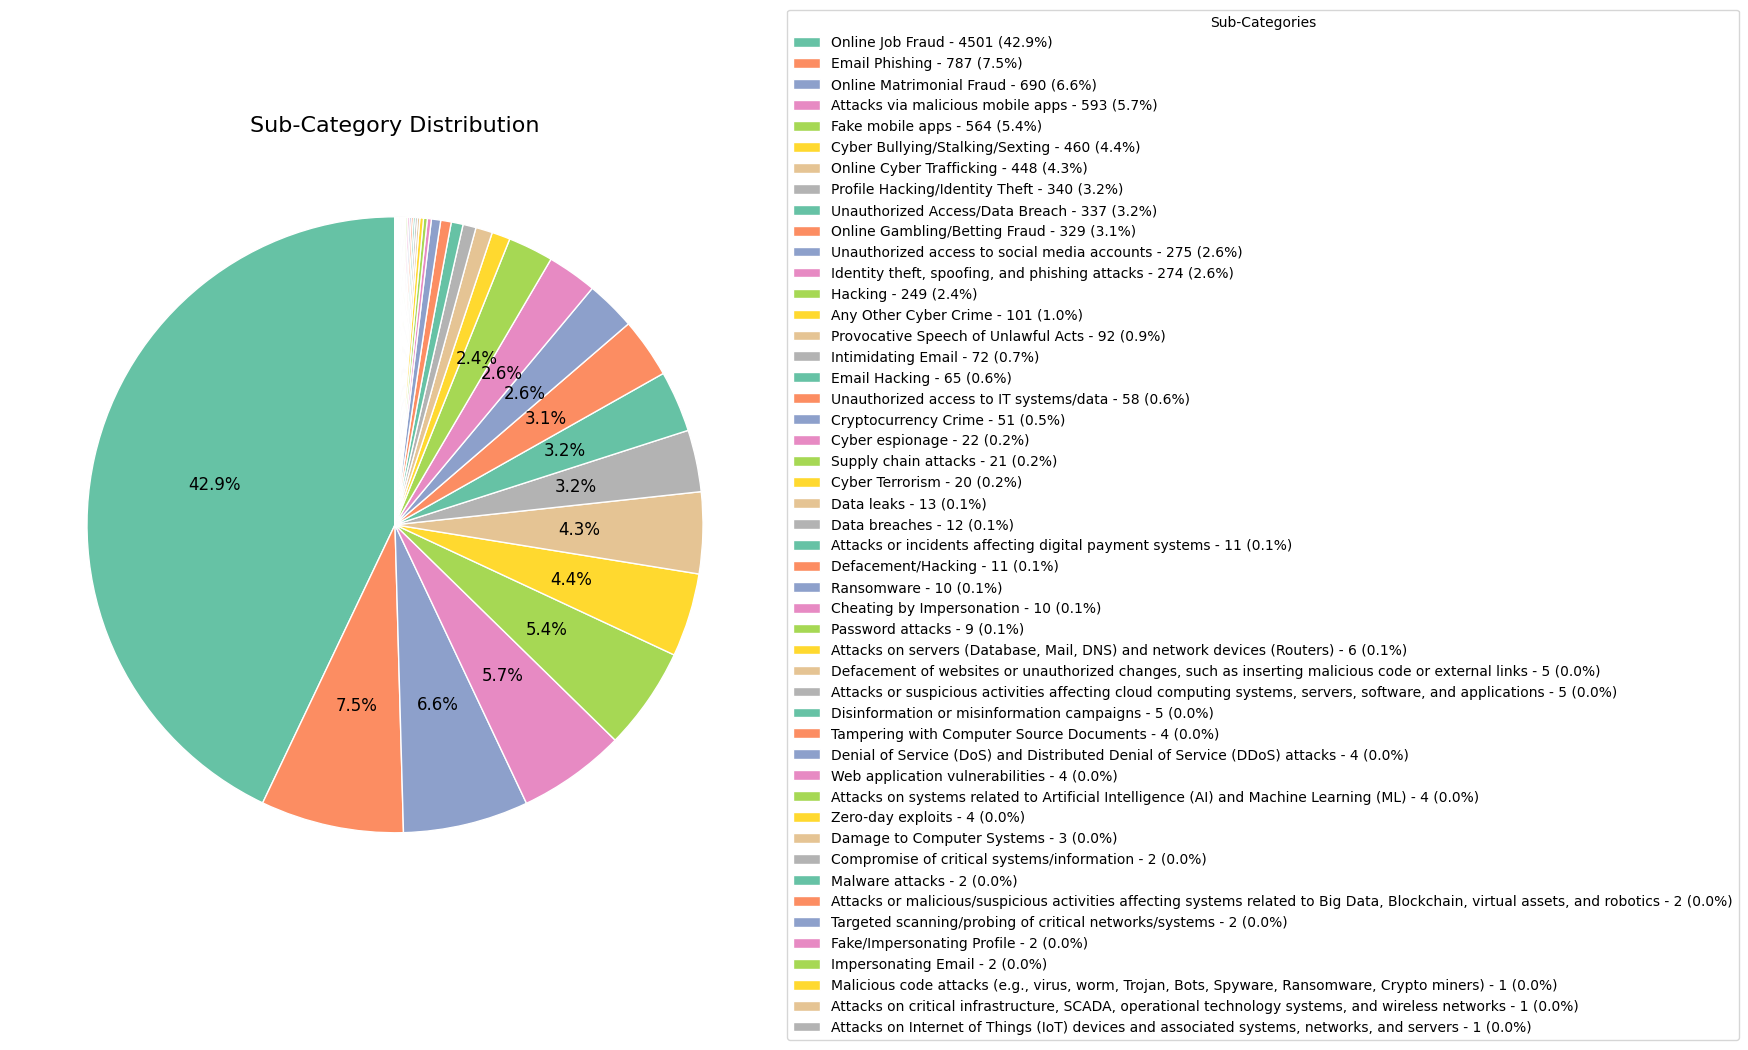

In [82]:
plt.figure(figsize=(12, 10))
wedges, texts, autotexts = plt.pie(subcategory_counts['count'],
                                   autopct=autopct_function,
                                   startangle=90,
                                   colors=palette,
                                   textprops={'fontsize': 12},
                                   wedgeprops={'linewidth': 1, 'edgecolor': 'white'}) 

plt.gca().set_aspect('equal')
plt.title('Sub-Category Distribution', fontsize=16)
legend_labels = [f'{subcategory_counts["sub_category"][i]} - {subcategory_counts["count"][i]} ({(subcategory_counts["count"][i] / subcategory_counts["count"].sum()) * 100:.1f}%)' for i in range(len(subcategory_counts))]
plt.legend(wedges, legend_labels, title="Sub-Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

In [79]:
pd.crosstab(df['category'],df['sub_category'])

sub_category,Any Other Cyber Crime,"Attacks on Internet of Things (IoT) devices and associated systems, networks, and servers","Attacks on critical infrastructure, SCADA, operational technology systems, and wireless networks","Attacks on servers (Database, Mail, DNS) and network devices (Routers)",Attacks on systems related to Artificial Intelligence (AI) and Machine Learning (ML),Attacks or incidents affecting digital payment systems,"Attacks or malicious/suspicious activities affecting systems related to Big Data, Blockchain, virtual assets, and robotics","Attacks or suspicious activities affecting cloud computing systems, servers, software, and applications",Attacks via malicious mobile apps,Cheating by Impersonation,...,Provocative Speech of Unlawful Acts,Ransomware,Supply chain attacks,Tampering with Computer Source Documents,Targeted scanning/probing of critical networks/systems,Unauthorized Access/Data Breach,Unauthorized access to IT systems/data,Unauthorized access to social media accounts,Web application vulnerabilities,Zero-day exploits
category,,,,,,,,,,,,,,,,,,,,,
Other Cyber Crime,101,1,1,6,4,11,2,5,593,10,...,92,10,21,4,2,337,58,275,4,4


<Axes: xlabel='sub_category', ylabel='category'>

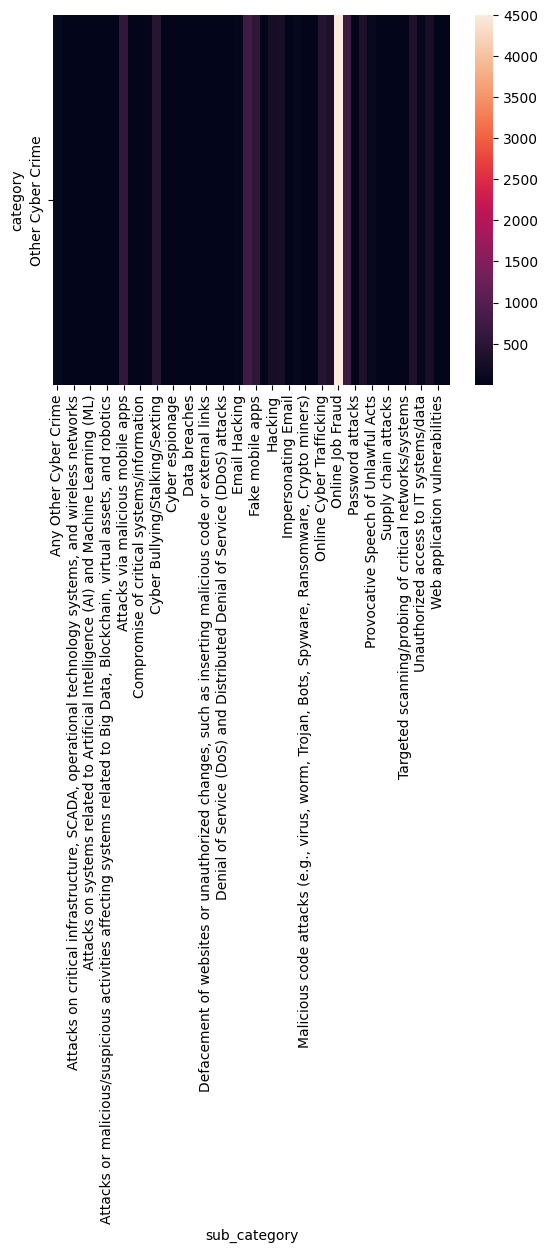

In [78]:
sns.heatmap(pd.crosstab(df['category'],df['sub_category']))